<a href="https://colab.research.google.com/github/zh4rif/Maps/blob/main/InSAR_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

import ipywidgets as widgets
widgets.IntSlider()



IntSlider(value=0)

In [ ]:
!pip install --upgrade numpy==1.26.4 pandas==2.2.2 scipy==1.15 --force-reinstall

# New Section

In [2]:
!pip install --upgrade numpy==1.26.4 pandas==2.2.2 scipy==1.15 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.1
    Uninstalling pytz-2025.1:
      Successfully uninstalled pytz-2025.1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.1
    Uninstalling tzdata-2025.1:
      Successfully uninstalled tzdata-2025.1
  Attempting uninstall: six
    Found existing installati

In [1]:
import platform, sys, os
if 'google.colab' in sys.modules:
    # install PyGMTSAR stable version from PyPI
    !{sys.executable} -m pip install -q pygmtsar 'scipy==1.11.4'
    # alternatively, install PyGMTSAR development version from GitHub
    #!{sys.executable} -m pip install -Uq git+https://github.com/mobigroup/gmtsar.git@pygmtsar2#subdirectory=pygmtsar 'scipy==1.11.4'
    # use PyGMTSAR Google Colab installation script to install binary dependencies
    # script URL: https://github.com/AlexeyPechnikov/pygmtsar/blob/pygmtsar2/pygmtsar/pygmtsar/data/google_colab.sh
    import importlib.resources as resources
    with resources.as_file(resources.files('pygmtsar.data') / 'google_colab.sh') as google_colab_script_filename:
        !sh {google_colab_script_filename}
    # enable custom widget manager as required by recent Google Colab updates
    from google.colab import output
    output.enable_custom_widget_manager()
    # initialize virtual framebuffer for interactive 3D visualization; required for headless environments
    import xvfbwrapper
    display = xvfbwrapper.Xvfb(width=800, height=600)
    display.start()

# specify GMTSAR installation path
PATH = os.environ['PATH']
if PATH.find('GMTSAR') == -1:
    PATH = os.environ['PATH'] + ':/usr/local/GMTSAR/bin/'
    %env PATH {PATH}

# display PyGMTSAR version
from pygmtsar import __version__
__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.8 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)




update-alternatives:

'2025.2.4'

In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import json
import shapely
from dask.distributed import Client
import psutil
import dask

In [7]:
# plotting modules
import pyvista as pv
# magic trick for white background
pv.set_plot_theme("document")
import panel
panel.extension(comms='ipywidgets')
panel.extension('vtk')
from contextlib import contextmanager
import matplotlib.pyplot as plt
@contextmanager
def mpl_settings(settings):
    original_settings = {k: plt.rcParams[k] for k in settings}
    plt.rcParams.update(settings)
    yield
    plt.rcParams.update(original_settings)
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

In [8]:
# define Pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

In [14]:
from pygmtsar import S1, Stack, tqdm_dask, ASF, Tiles

In [43]:
DEM = f'{EXTRACT_DIR}/dem.nc'
LANDMASK = f'{EXTRACT_DIR}/landmask.nc'

# Orbit Configuration


In [55]:
POLARIZATION = 'VV'
ORBIT        = 'A'
SUBSWATH     = 123

In [69]:
# Magnitude Mw 7.8 & 7.5
# Region    CENTRAL TURKEY
# Date      2023-02-06
EPICENTERS = [17.97,49.52,18.98,50.16]  # Replace with real coordinates (lon, lat)
POI = gpd.GeoDataFrame(geometry=[shapely.geometry.Point(coord) for coord in np.reshape(EPICENTERS, (2, -1))])

POI

,geometry
0,POINT (17.97 49.52)
1,POINT (18.98 50.16)


In [31]:
import asf_search as asf
import os

# --- User credentials ---
ASF_USERNAME = "GoogleColab2023"  # Replace with your ASF username
ASF_PASSWORD = "GoogleColab_2023"  # Replace with your ASF password

# --- List of Sentinel-1 Scene IDs ---
SCENES = [
    "S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7",
    "S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6"
]

print(f"Total Scenes to Download: {len(SCENES)}")

# --- Set download directory ---
DATADIR = "data_kahr"
os.makedirs(DATADIR, exist_ok=True)

# --- Authenticate session ---
session = asf.ASFSession().auth_with_creds(ASF_USERNAME, ASF_PASSWORD)

# --- Loop through each scene and download ---
for scene_id in SCENES:
    print(f"\n🔍 Searching for scene: {scene_id}")
    results = asf.search(granule_list=[scene_id], processingLevel="SLC")

    if results and len(results) > 0:
        print(f"📥 Downloading: {results[0].properties['fileID']}")
        results[0].download(path=DATADIR, session=session)
        print("✅ Download complete!")
    else:
        print(f"⚠️ Scene not found: {scene_id}. Check Scene ID or API response.")

print("\n🎉 All downloads completed!")


Total Scenes to Download: 2

🔍 Searching for scene: S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7
📥 Downloading: S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7-SLC
✅ Download complete!

🔍 Searching for scene: S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6
📥 Downloading: S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6-SLC
✅ Download complete!

🎉 All downloads completed!


/usr/local/lib/python3.11/dist-packages/asf_search/download/download.py:66: UserWarning: File already exists, skipping download: data_kahr/S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.zip
  warnings.warn(f'File already exists, skipping download: {os.path.join(path, filename)}')
/usr/local/lib/python3.11/dist-packages/asf_search/download/download.py:66: UserWarning: File already exists, skipping download: data_kahr/S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.zip
  warnings.warn(f'File already exists, skipping download: {os.path.join(path, filename)}')


In [33]:
import zipfile
import os

# --- Define paths ---
DATADIR = "data_kahr"  # Folder where the zip files are stored
EXTRACT_DIR = "extracted_data_kahr"  # Folder to extract contents

# --- Ensure the extract directory exists ---
os.makedirs(EXTRACT_DIR, exist_ok=True)

# --- Find all zip files in the directory ---
zip_files = [f for f in os.listdir(DATADIR) if f.endswith(".zip")]

if zip_files:
    print(f"Found {len(zip_files)} zip files. Extracting them now...")

    for zip_filename in zip_files:
        zip_path = os.path.join(DATADIR, zip_filename)
        print(f"📦 Extracting: {zip_filename} → {EXTRACT_DIR}")

        try:
            with zipfile.ZipFile(zip_path, "r") as zip_ref:
                zip_ref.extractall(EXTRACT_DIR)
            print(f"✅ Successfully extracted: {zip_filename}\n")
        except zipfile.BadZipFile:
            print(f"❌ Error: Corrupted zip file - {zip_filename}")
        except Exception as e:
            print(f"⚠️ Unexpected error with {zip_filename}: {e}")

    print("\n🎉 All extractions completed!")
else:
    print("⚠️ No .zip files found in the download directory.")


Found 2 zip files. Extracting them now...
📦 Extracting: S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.zip → extracted_data_kahr
✅ Successfully extracted: S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.zip

📦 Extracting: S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.zip → extracted_data_kahr
✅ Successfully extracted: S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.zip


🎉 All extractions completed!


In [34]:
# scan the data directory for SLC scenes and download missed orbits
S1.download_orbits(EXTRACT_DIR, S1.scan_slc(EXTRACT_DIR))

NOTE: Found multiple scenes for a single day, use function Stack.reframe() to stitch the scenes


,orbit
0,S1B_OPER_AUX_POEORB_OPOD_20210306T001528_V20191207T225942_20191209T005942.EOF.zip
1,S1B_OPER_AUX_POEORB_OPOD_20210306T050312_V20191219T225942_20191221T005942.EOF.zip


NOTE: Found multiple scenes for a single day, use function Stack.reframe() to stitch the scenes
✅ AOI successfully extracted.
NOTE: Target file exists, return it. Use "skip_exist=False" or omit the filename to allow new downloading.
✅ DEM downloaded successfully: dem.tif


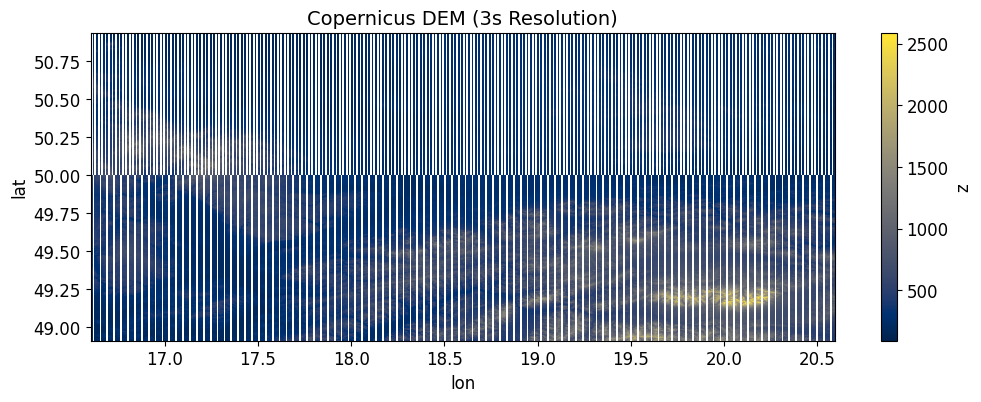

In [41]:


# --- Define AOI based on extracted Sentinel-1 scenes ---
try:
    AOI = S1.scan_slc("extracted_data_kahr")  # Ensure this contains valid Sentinel-1 SAFE files
    print("✅ AOI successfully extracted.")
except Exception as e:
    print(f"❌ Error extracting AOI: {e}")
    AOI = None

# --- Download Copernicus DEM (3s resolution) ---
DEM_PATH = "dem.tif"

if AOI is not None and not AOI.empty:  # 🔥 FIXED: Explicitly check if AOI is valid
    try:
        dem_data = Tiles().download_dem(AOI, filename=DEM_PATH, product="3s")
        print(f"✅ DEM downloaded successfully: {DEM_PATH}")

        # --- Plot DEM ---
        dem_data.plot.imshow(cmap="cividis")
        plt.title("Copernicus DEM (3s Resolution)")
        plt.show()
    except Exception as e:
        print(f"❌ Error downloading DEM: {e}")
else:
    print("⚠️ Skipping DEM download. AOI is empty or not available.")


Tiles Parallel Downloading:   0%|          | 0/15 [00:00<?, ?it/s]

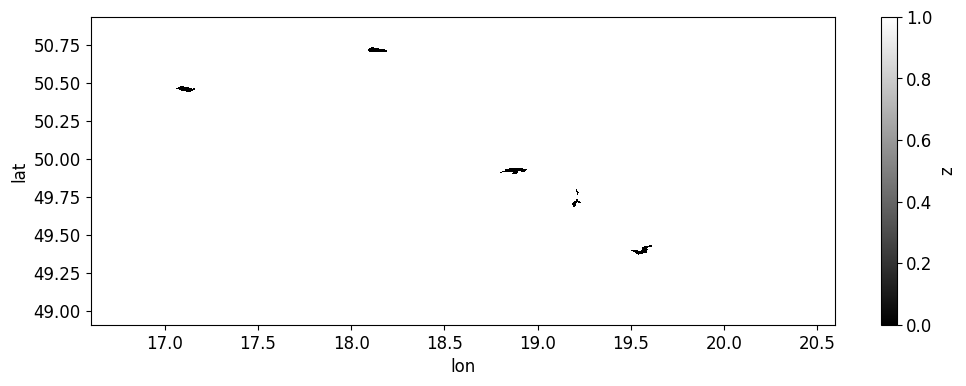

In [44]:
# download land mask 1 arc-second
Tiles().download_landmask(AOI, filename=LANDMASK, product='3s').fillna(0).plot.imshow(cmap='binary_r')


# Dask Cluster

In [45]:
# cleanup for repeatable runs
if 'client' in globals():
    client.close()
# tune to use 4 cores per worker and allocate only the available RAM
# swap is not allowed on Google Colab and is typically small in Docker containers (0.5 - 1GB by default),
# so we rely entirely on available physical memory in such environments.
client = Client(n_workers=max(1, psutil.cpu_count() // 4),
                threads_per_worker=min(4, psutil.cpu_count()),
                memory_limit=max(4e9, psutil.virtual_memory().available))
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:46467
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46337'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:33013 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33013
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:52184
INFO:distributed.scheduler:Receive client connection: Client-fed189c7-073d-11f0-8379-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:52188


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 2,Total memory: 8.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46467,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 8.80 GiB
Comm: tcp://127.0.0.1:33013,Total threads: 2
Dashboard: http://127.0.0.1:42313/status,Memory: 8.80 GiB
Nanny: tcp://127.0.0.1:46337,


In [81]:
scenes = S1.scan_slc(EXTRACT_DIR, polarization=POLARIZATION, orbit=ORBIT)

In [82]:
sbas = Stack(WORKDIR, drop_if_exists=True).set_scenes(scenes)
sbas.to_dataframe()

NOTE: auto set reference scene 2019-12-08. You can change it like Stack.set_reference("2022-01-20")


,datetime,orbit,mission,polarization,subswath,datapath,metapath,noisepath,calibpath,orbitpath,geometry
date,,,,,,,,,,,
2019-12-08,2019-12-08 16:34:24,A,S1B,VV,1,extracted_data_kahr/S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.SAFE/mea...,extracted_data_kahr/S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.SAFE/ann...,None,None,extracted_data_kahr/S1B_OPER_AUX_POEORB_OPOD_20210306T001528_V20191207T225942_20191209T005942.EOF,"MULTIPOLYGON (((17.07584 48.91122, 17.14428 48.92018, 17.21202 48.929, 17.27909 48.93769, 17.345..."
2019-12-08,2019-12-08 16:34:22,A,S1B,VV,2,extracted_data_kahr/S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.SAFE/mea...,extracted_data_kahr/S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.SAFE/ann...,None,None,extracted_data_kahr/S1B_OPER_AUX_POEORB_OPOD_20210306T001528_V20191207T225942_20191209T005942.EOF,"MULTIPOLYGON (((18.25822 48.94747, 18.32731 48.95578, 18.39589 48.964, 18.46397 48.97211, 18.531..."
2019-12-08,2019-12-08 16:34:23,A,S1B,VV,3,extracted_data_kahr/S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.SAFE/mea...,extracted_data_kahr/S1B_IW_SLC__1SDV_20191208T163422_20191208T163449_019276_024651_E2F6.SAFE/ann...,None,None,extracted_data_kahr/S1B_OPER_AUX_POEORB_OPOD_20210306T001528_V20191207T225942_20191209T005942.EOF,"MULTIPOLYGON (((19.44521 49.14337, 19.5049 49.14989, 19.5643 49.15635, 19.62344 49.16275, 19.682..."
2019-12-20,2019-12-20 16:34:23,A,S1B,VV,1,extracted_data_kahr/S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.SAFE/mea...,extracted_data_kahr/S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.SAFE/ann...,None,None,extracted_data_kahr/S1B_OPER_AUX_POEORB_OPOD_20210306T050312_V20191219T225942_20191221T005942.EOF,"MULTIPOLYGON (((17.07503 48.91085, 17.14347 48.91981, 17.21121 48.92863, 17.27828 48.93732, 17.3..."
2019-12-20,2019-12-20 16:34:21,A,S1B,VV,2,extracted_data_kahr/S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.SAFE/mea...,extracted_data_kahr/S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.SAFE/ann...,None,None,extracted_data_kahr/S1B_OPER_AUX_POEORB_OPOD_20210306T050312_V20191219T225942_20191221T005942.EOF,"MULTIPOLYGON (((18.25745 48.94699, 18.32653 48.95531, 18.39511 48.96352, 18.4632 48.97163, 18.53..."
2019-12-20,2019-12-20 16:34:22,A,S1B,VV,3,extracted_data_kahr/S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.SAFE/mea...,extracted_data_kahr/S1B_IW_SLC__1SDV_20191220T163421_20191220T163448_019451_024BE6_79C7.SAFE/ann...,None,None,extracted_data_kahr/S1B_OPER_AUX_POEORB_OPOD_20210306T050312_V20191219T225942_20191221T005942.EOF,"MULTIPOLYGON (((19.44443 49.1429, 19.50412 49.14943, 19.56352 49.15589, 19.62266 49.16229, 19.68..."


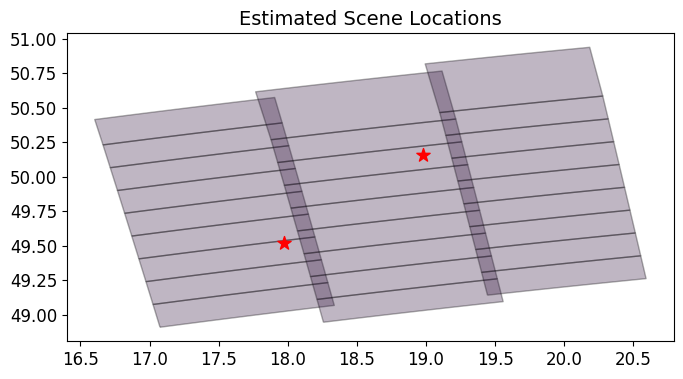

In [83]:
sbas.plot_scenes(POI=POI)

In [84]:
sbas.compute_reframe()

Reframing:   0%|          | 0/6 [00:00<?, ?it/s]

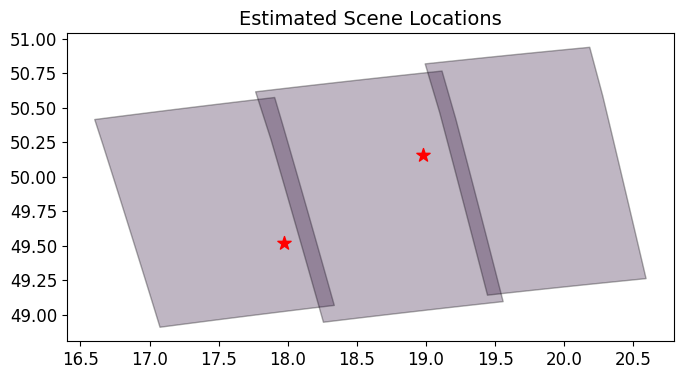

In [85]:
sbas.plot_scenes(POI=POI)

In [86]:
# define the area of interest (AOI) to speedup the processing
sbas.load_dem(DEM, AOI)

Save DEM on WGS84 Ellipsoid:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

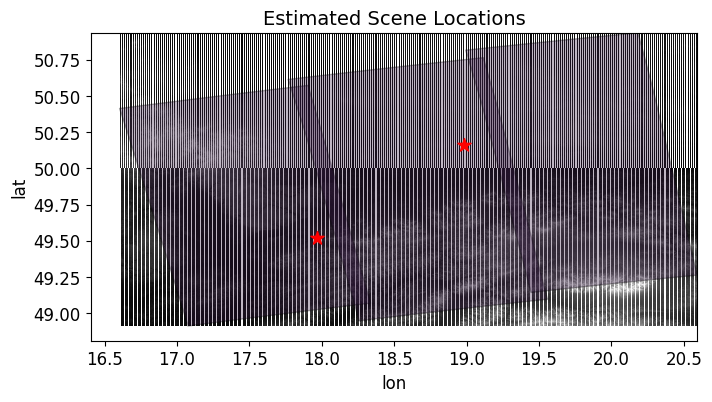

In [87]:
sbas.plot_scenes(POI=POI)
plt.savefig('Estimated Scene Locations.jpg')

In [88]:
if os.path.exists('/.dockerenv'):
    # adjust for Docker environments, including Google Colab instances
    sbas.compute_align(n_jobs=max(1, (psutil.cpu_count() // 2)))
else:
    sbas.compute_align()

Preparing Reference:   0%|          | 0/3 [00:00<?, ?it/s]

Aligning Repeat:   0%|          | 0/3 [00:00<?, ?it/s]

In [89]:
sbas.compute_geocode(RESOLUTION)

ValueError: cannot reshape array of size 0 into shape (4,5)

In [91]:
print(AOI)
print(AOI.empty)  # Check if AOI has no valid data


                      datetime orbit mission polarization  subswath  \
date                                                                  
2019-12-08 2019-12-08 16:34:24     A     S1B           VH         1   
2019-12-08 2019-12-08 16:34:24     A     S1B           VV         1   
2019-12-08 2019-12-08 16:34:22     A     S1B           VH         2   
2019-12-08 2019-12-08 16:34:22     A     S1B           VV         2   
2019-12-08 2019-12-08 16:34:23     A     S1B           VH         3   
2019-12-08 2019-12-08 16:34:23     A     S1B           VV         3   
2019-12-20 2019-12-20 16:34:23     A     S1B           VH         1   
2019-12-20 2019-12-20 16:34:23     A     S1B           VV         1   
2019-12-20 2019-12-20 16:34:21     A     S1B           VH         2   
2019-12-20 2019-12-20 16:34:21     A     S1B           VV         2   
2019-12-20 2019-12-20 16:34:22     A     S1B           VH         3   
2019-12-20 2019-12-20 16:34:22     A     S1B           VV         3   

     

In [90]:
sbas.plot_topo(POI=sbas.geocode(POI))
plt.savefig('Topography on WGS84 ellipsoid, [m].jpg')

ValueError: Point() takes only scalar or 1-size vector arguments, got (array([], shape=(0, 2), dtype=float64),)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# for a pair of scenes only two interferograms can be produced
# this one is selected for scenes sorted by the date in direct order
pairs = [sbas.to_dataframe().index.unique()]
pairs